In [1]:
#Import the sqlite3 module and other libraries

import sqlite3
import pandas as pd
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Import time series-specific libraries
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# Date handling
import datetime

# ANALYSIS FOR 2015

In [2]:
df = pd.read_csv('C:/Users/Adekoyejo.dada/Desktop/3signet/AdventureWorks_Sales_2015.csv')

#Convert the date column to datetime format
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df['StockDate'] = pd.to_datetime(df['StockDate'])
print(df.info())
df['OrderDate'] = df['OrderDate'].dt.strftime('%Y/%m/%d')
df['StockDate'] = df['StockDate'].dt.strftime('%Y/%m/%d')
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2630 entries, 0 to 2629
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   OrderDate      2630 non-null   datetime64[ns]
 1   StockDate      2630 non-null   datetime64[ns]
 2   OrderNumber    2630 non-null   object        
 3   ProductKey     2630 non-null   int64         
 4   CustomerKey    2630 non-null   int64         
 5   TerritoryKey   2630 non-null   int64         
 6   OrderLineItem  2630 non-null   int64         
 7   OrderQuantity  2630 non-null   int64         
dtypes: datetime64[ns](2), int64(5), object(1)
memory usage: 164.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2630 entries, 0 to 2629
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   OrderDate      2630 non-null   object
 1   StockDate      2630 non-null   object
 2   OrderNumber    2630 non-n

In [3]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df['StockDate'] = pd.to_datetime(df['StockDate'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2630 entries, 0 to 2629
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   OrderDate      2630 non-null   datetime64[ns]
 1   StockDate      2630 non-null   datetime64[ns]
 2   OrderNumber    2630 non-null   object        
 3   ProductKey     2630 non-null   int64         
 4   CustomerKey    2630 non-null   int64         
 5   TerritoryKey   2630 non-null   int64         
 6   OrderLineItem  2630 non-null   int64         
 7   OrderQuantity  2630 non-null   int64         
dtypes: datetime64[ns](2), int64(5), object(1)
memory usage: 164.5+ KB
None


In [4]:
print (df)


      OrderDate  StockDate OrderNumber  ProductKey  CustomerKey  TerritoryKey  \
0    2015-01-01 2001-09-21     SO45080         332        14657             1   
1    2015-01-01 2001-12-05     SO45079         312        29255             4   
2    2015-01-01 2001-10-29     SO45082         350        11455             9   
3    2015-01-01 2001-11-16     SO45081         338        26782             6   
4    2015-01-02 2001-12-15     SO45083         312        14947            10   
...         ...        ...         ...         ...          ...           ...   
2625 2015-12-31 2002-11-29     SO48728         354        13111             9   
2626 2015-12-31 2002-11-14     SO48729         324        26563             9   
2627 2015-12-31 2002-12-02     SO48724         340        20722             8   
2628 2015-12-31 2002-10-09     SO48723         369        14944             7   
2629 2015-12-31 2002-11-22     SO48726         383        24915             9   

      OrderLineItem  OrderQ

In [5]:
# Create a new column for Year-Month to aggregate data on a monthly basis
df['YearMonth'] = df['OrderDate'].dt.to_period('M')


In [6]:
# Aggregate the sales (OrderQuantity) by Year-Month to analyze the trend
monthly_sales = df.groupby('YearMonth')['OrderQuantity'].sum().reset_index()


In [7]:
# Convert YearMonth back to a datetime format for visualization
monthly_sales['YearMonth'] = monthly_sales['YearMonth'].dt.to_timestamp()


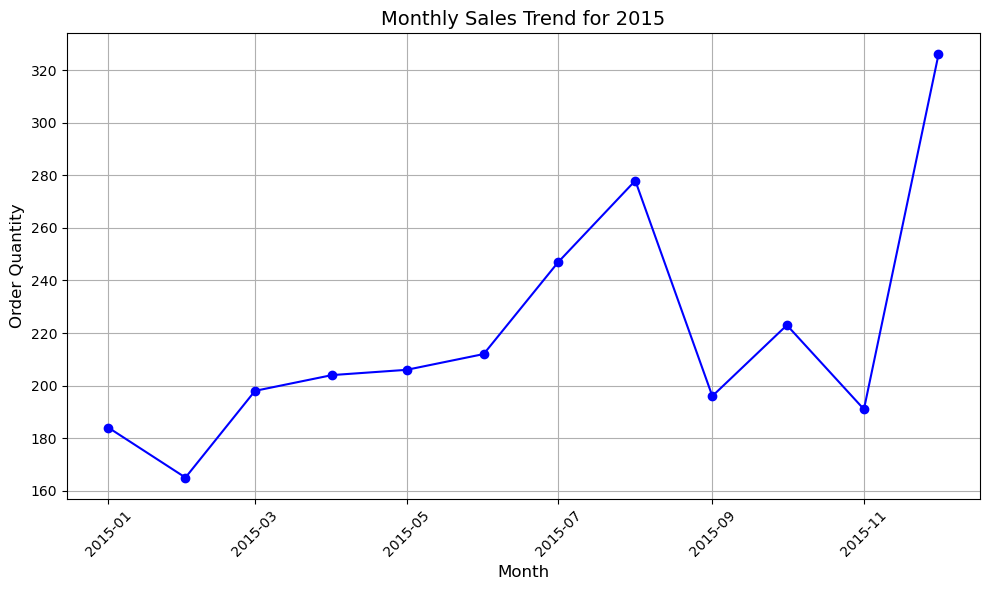

In [8]:
import matplotlib.pyplot as plt

# Plot the monthly sales data
plt.figure(figsize=(10,6))
plt.plot(monthly_sales['YearMonth'], monthly_sales['OrderQuantity'], marker='o', linestyle='-', color='b')
plt.title('Monthly Sales Trend for 2015', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Order Quantity', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#The Line chart below signifies that more sales took place in the month of December, 2015.

In [9]:
#Extract the month string 
df['month_string']=df['OrderDate'].dt.strftime('%B')
print(df[['OrderDate', 'month_string']])

df['month_string']=df['StockDate'].dt.strftime('%B')
print(df[['StockDate', 'month_string']]) 

      OrderDate month_string
0    2015-01-01      January
1    2015-01-01      January
2    2015-01-01      January
3    2015-01-01      January
4    2015-01-02      January
...         ...          ...
2625 2015-12-31     December
2626 2015-12-31     December
2627 2015-12-31     December
2628 2015-12-31     December
2629 2015-12-31     December

[2630 rows x 2 columns]
      StockDate month_string
0    2001-09-21    September
1    2001-12-05     December
2    2001-10-29      October
3    2001-11-16     November
4    2001-12-15     December
...         ...          ...
2625 2002-11-29     November
2626 2002-11-14     November
2627 2002-12-02     December
2628 2002-10-09      October
2629 2002-11-22     November

[2630 rows x 2 columns]


In [10]:
#Extract year from the OrderDate and StockDate column
df['year'] = df['OrderDate'].dt.year
print(df[['OrderDate', 'year']])

df['year'] = df['StockDate'].dt.year
print(df[['StockDate', 'year']])

      OrderDate  year
0    2015-01-01  2015
1    2015-01-01  2015
2    2015-01-01  2015
3    2015-01-01  2015
4    2015-01-02  2015
...         ...   ...
2625 2015-12-31  2015
2626 2015-12-31  2015
2627 2015-12-31  2015
2628 2015-12-31  2015
2629 2015-12-31  2015

[2630 rows x 2 columns]
      StockDate  year
0    2001-09-21  2001
1    2001-12-05  2001
2    2001-10-29  2001
3    2001-11-16  2001
4    2001-12-15  2001
...         ...   ...
2625 2002-11-29  2002
2626 2002-11-14  2002
2627 2002-12-02  2002
2628 2002-10-09  2002
2629 2002-11-22  2002

[2630 rows x 2 columns]


# TOP 10 PERFORMING PRODUCTS BASED ON SALES IN 2015.

In [11]:
# Group data by 'Product' and 'Region' for total sales
product_sales = df.groupby('ProductKey')['OrderQuantity'].sum().sort_values(ascending=False)
region_sales = df.groupby('TerritoryKey')['OrderQuantity'].sum().sort_values(ascending=False)

# Display top products and regions
print("Top Performing Products:\n", product_sales.head())
print("Top Performing Regions:\n", region_sales.head())


Top Performing Products:
 ProductKey
312    179
310    169
313    168
314    157
311    139
Name: OrderQuantity, dtype: int64
Top Performing Regions:
 TerritoryKey
9     848
4     514
1     334
10    255
7     229
Name: OrderQuantity, dtype: int64


In [12]:
fact_table = pd.read_csv('C:/Users/Adekoyejo.dada/Desktop/3signet/AdventureWorks_Sales_2015.csv')
dimension_table =pd.read_csv('C:/Users/Adekoyejo.dada/Desktop/3signet/AdventureWorks_Products.csv')

In [13]:
#Join the fact table and dimension table based on ProductKey

merged_data =pd.merge(fact_table, dimension_table, on='ProductKey', how = 'inner')

In [14]:
print(merged_data)

       OrderDate   StockDate OrderNumber  ProductKey  CustomerKey  \
0     01/01/2015   9/21/2001     SO45080         332        14657   
1     02/06/2015  10/12/2001     SO45383         332        14734   
2     03/03/2015   1/27/2002     SO45596         332        20564   
3      3/26/2015  02/05/2002     SO45748         332        18046   
4      4/14/2015  02/12/2002     SO45894         332        19450   
...          ...         ...         ...         ...          ...   
2625  12/16/2015  10/11/2002     SO48570         389        26504   
2626  12/17/2015  10/02/2002     SO48585         389        24919   
2627  12/21/2015   9/13/2002     SO48629         389        24916   
2628  12/25/2015  10/25/2002     SO48667         389        19341   
2629  12/25/2015   9/24/2002     SO48668         389        18626   

      TerritoryKey  OrderLineItem  OrderQuantity  ProductSubcategoryKey  \
0                1              1              1                      2   
1                1   

In [15]:
#Calculate total revenue for each product (quantity * price)

merged_data['total_revenue'] = merged_data['OrderQuantity'] * merged_data['ProductPrice'] 


In [16]:
#Group by productkey and productname to get total revenue per product

product_revenue = merged_data.groupby(['ProductKey', 'ProductName'])['total_revenue'].sum().reset_index()

print(product_revenue)

    ProductKey              ProductName  total_revenue
0          310         Road-150 Red, 62    604727.6300
1          311         Road-150 Red, 44    497379.5300
2          312         Road-150 Red, 48    640510.3300
3          313         Road-150 Red, 52    601149.3600
4          314         Road-150 Red, 56    561788.3900
5          320         Road-650 Red, 58     23070.2406
6          322         Road-650 Red, 60     16778.3568
7          324         Road-650 Red, 62     28663.0262
8          326         Road-650 Red, 44     24468.4370
9          328         Road-650 Red, 48     27963.9280
10         330         Road-650 Red, 52     16778.3568
11         332       Road-650 Black, 58     21672.0442
12         334       Road-650 Black, 60     25167.5352
13         336       Road-650 Black, 62     19574.7496
14         338       Road-650 Black, 44     20972.9460
15         340       Road-650 Black, 48     18875.6514
16         342       Road-650 Black, 52     27963.9280
17        

In [17]:
# Sort the products by total revenue in descending order
top_10_products = product_revenue.sort_values(by='total_revenue', ascending=False).head(10)

In [18]:
print(top_10_products)

    ProductKey         ProductName  total_revenue
2          312    Road-150 Red, 48    640510.3300
0          310    Road-150 Red, 62    604727.6300
3          313    Road-150 Red, 52    601149.3600
4          314    Road-150 Red, 56    561788.3900
1          311    Road-150 Red, 44    497379.5300
37         377  Road-250 Black, 52    235608.7500
34         371    Road-250 Red, 58    231245.6250
32         369    Road-250 Red, 48    219901.5000
33         370    Road-250 Red, 52    195468.0000
36         375  Road-250 Black, 48    181069.6875


In [19]:
df = pd.DataFrame(top_10_products)

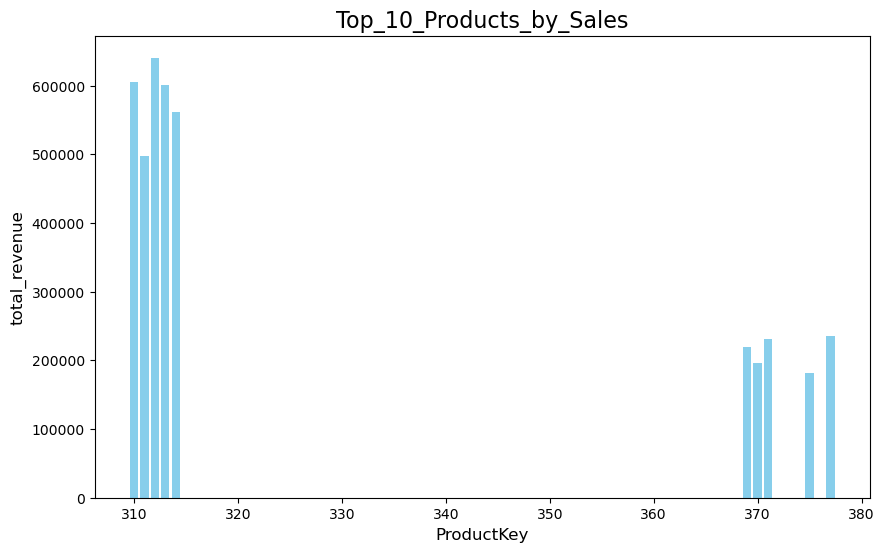

In [20]:
plt.figure(figsize=(10,6))
plt.bar(df['ProductKey'], df['total_revenue'], color='skyblue')
plt.title('Top_10_Products_by_Sales', fontsize=16)
plt.xlabel('ProductKey', fontsize=12)
plt.ylabel('total_revenue', fontsize=12)
plt.show()


# TOP 10 PERFORMING REGIONS BASED ON SALES IN 2015

In [21]:
fact_table = pd.read_csv('C:/Users/Adekoyejo.dada/Desktop/3signet/AdventureWorks_Sales_2015.csv')
dimension_table =pd.read_csv('C:/Users/Adekoyejo.dada/Desktop/3signet/AdventureWorks_Territories.csv')

In [22]:
print(fact_table)
print(dimension_table)

       OrderDate   StockDate OrderNumber  ProductKey  CustomerKey  \
0     01/01/2015   9/21/2001     SO45080         332        14657   
1     01/01/2015  12/05/2001     SO45079         312        29255   
2     01/01/2015  10/29/2001     SO45082         350        11455   
3     01/01/2015  11/16/2001     SO45081         338        26782   
4     01/02/2015  12/15/2001     SO45083         312        14947   
...          ...         ...         ...         ...          ...   
2625  12/31/2015  11/29/2002     SO48728         354        13111   
2626  12/31/2015  11/14/2002     SO48729         324        26563   
2627  12/31/2015  12/02/2002     SO48724         340        20722   
2628  12/31/2015  10/09/2002     SO48723         369        14944   
2629  12/31/2015  11/22/2002     SO48726         383        24915   

      TerritoryKey  OrderLineItem  OrderQuantity  
0                1              1              1  
1                4              1              1  
2                9

In [23]:
dimension_table.rename(columns={'SalesTerritoryKey' : 'TerritoryKey'}, inplace=True)


In [24]:
#Join the fact table and dimension table based on TerritoryKey

merged_data =pd.merge(fact_table, dimension_table, on='TerritoryKey', how = 'inner')

In [25]:
print(merged_data)

       OrderDate   StockDate OrderNumber  ProductKey  CustomerKey  \
0     01/01/2015   9/21/2001     SO45080         332        14657   
1     01/04/2015   9/15/2001     SO45098         310        29167   
2     01/04/2015  12/20/2001     SO45099         312        29174   
3     01/06/2015   9/24/2001     SO45103         310        29140   
4     01/08/2015  11/21/2001     SO45117         342        14727   
...          ...         ...         ...         ...          ...   
2625  12/28/2015  10/02/2002     SO48692         381        18171   
2626  12/29/2015  10/23/2002     SO48708         377        16466   
2627  12/29/2015  10/05/2002     SO48704         369        16429   
2628  12/31/2015  12/02/2002     SO48724         340        20722   
2629  08/02/2015   6/18/2002     SO47082         322        15254   

      TerritoryKey  OrderLineItem  OrderQuantity     Region        Country  \
0                1              1              1  Northwest  United States   
1              

In [26]:
region_sales = merged_data.groupby(['TerritoryKey', 'Region'])['OrderQuantity'].sum().reset_index()

print(region_sales)

   TerritoryKey          Region  OrderQuantity
0             1       Northwest            334
1             4       Southwest            514
2             5       Southeast              1
3             6          Canada            223
4             7          France            229
5             8         Germany            226
6             9       Australia            848
7            10  United Kingdom            255


In [27]:
top_regions = region_sales.sort_values(by='OrderQuantity', ascending=False).head(7)

In [28]:
print(top_regions)

   TerritoryKey          Region  OrderQuantity
6             9       Australia            848
1             4       Southwest            514
0             1       Northwest            334
7            10  United Kingdom            255
4             7          France            229
5             8         Germany            226
3             6          Canada            223


In [29]:
df = pd.DataFrame(top_regions)

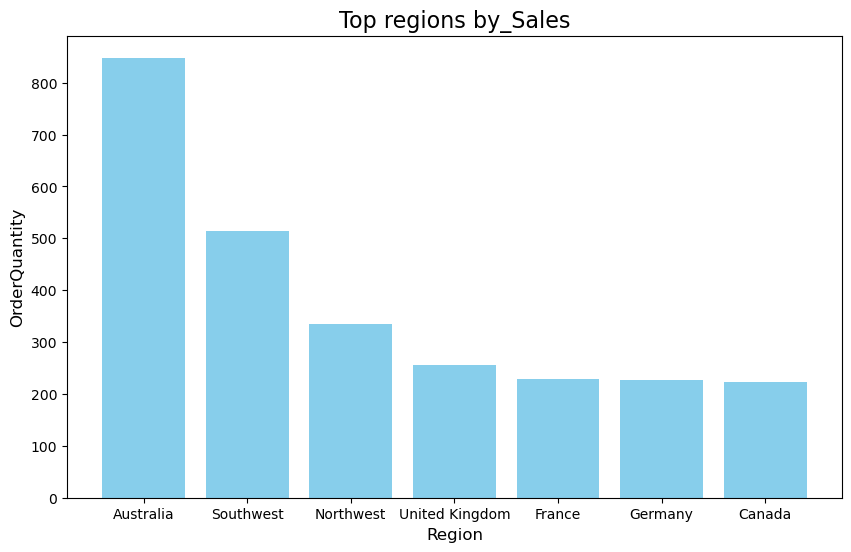

In [30]:
plt.figure(figsize=(10,6))
plt.bar(df['Region'], df['OrderQuantity'], color='skyblue')
plt.title('Top regions by_Sales', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('OrderQuantity', fontsize=12)
plt.show()

# ANALYSIS FOR JULY 2016

In [31]:
df = pd.read_csv('C:/Users/Adekoyejo.dada/Desktop/3signet/AdventureWorks_Sales_2016.csv')

In [32]:
#Convert the date column to datetime format
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df['OrderDate'] = df['OrderDate'].dt.strftime('%Y/%m/%d')

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23935 entries, 0 to 23934
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   OrderDate      23935 non-null  object
 1   StockDate      23935 non-null  object
 2   OrderNumber    23935 non-null  object
 3   ProductKey     23935 non-null  int64 
 4   CustomerKey    23935 non-null  int64 
 5   TerritoryKey   23935 non-null  int64 
 6   OrderLineItem  23935 non-null  int64 
 7   OrderQuantity  23935 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 1.5+ MB
None
    OrderDate   StockDate OrderNumber  ProductKey  CustomerKey  TerritoryKey  \
0  2016/01/01  10/17/2002     SO48797         385        14335             1   
1  2016/01/01   9/30/2002     SO48802         383        24923             9   
2  2016/01/01  11/29/2002     SO48801         326        15493             1   
3  2016/01/01  11/16/2002     SO48799         352        26708             4   
4  2016

In [33]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23935 entries, 0 to 23934
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   OrderDate      23935 non-null  datetime64[ns]
 1   StockDate      23935 non-null  object        
 2   OrderNumber    23935 non-null  object        
 3   ProductKey     23935 non-null  int64         
 4   CustomerKey    23935 non-null  int64         
 5   TerritoryKey   23935 non-null  int64         
 6   OrderLineItem  23935 non-null  int64         
 7   OrderQuantity  23935 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 1.5+ MB
None


In [34]:
# Filter for July 2016
july_data = df[(df['OrderDate'] >= '2016/07/01') & (df['OrderDate'] <= '2016/07/31')]

In [35]:
# Set the date as the index
july_data.set_index('OrderDate', inplace=True)
daily_sales = july_data.resample('D').sum()

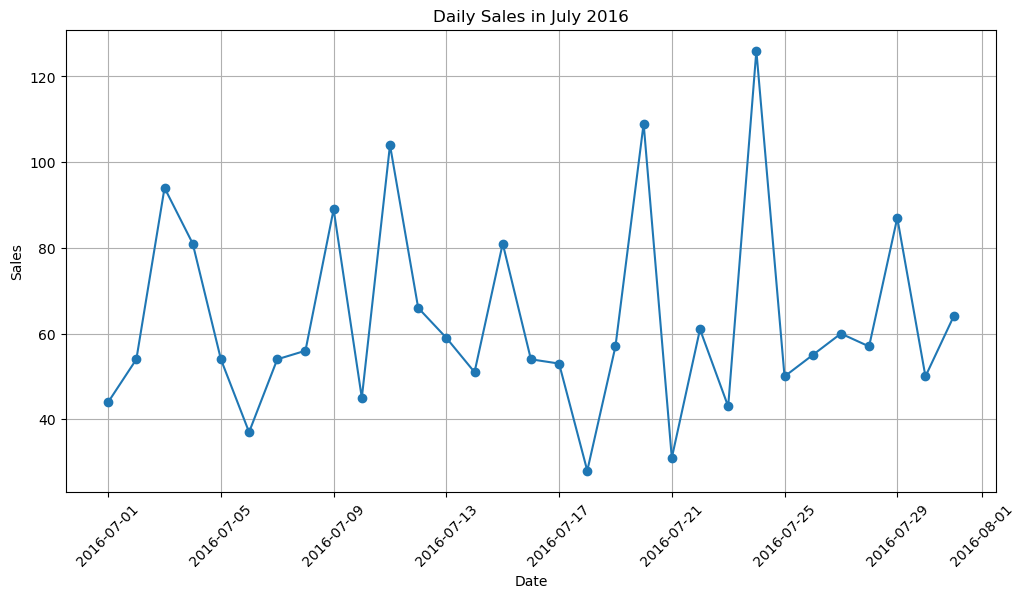

In [36]:
# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales['OrderQuantity'], marker='o')
plt.title('Daily Sales in July 2016')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid()
plt.xticks(rotation=45)
plt.show()

#The chart below shows that most sales were made on the 24th of July, 2016.

# TOP PERFORMING PRODUCTS IN JULY 2016

In [37]:
fact_table = pd.read_csv('C:/Users/Adekoyejo.dada/Desktop/3signet/AdventureWorks_Sales_2016.csv')
dimension_table =pd.read_csv('C:/Users/Adekoyejo.dada/Desktop/3signet/AdventureWorks_Products.csv')

In [38]:
print(fact_table)
print(dimension_table)

        OrderDate   StockDate OrderNumber  ProductKey  CustomerKey  \
0      01/01/2016  10/17/2002     SO48797         385        14335   
1      01/01/2016   9/30/2002     SO48802         383        24923   
2      01/01/2016  11/29/2002     SO48801         326        15493   
3      01/01/2016  11/16/2002     SO48799         352        26708   
4      01/01/2016  12/16/2002     SO48798         369        23332   
...           ...         ...         ...         ...          ...   
23930  12/31/2016  12/11/2003     SO61111         591        17841   
23931  12/31/2016  10/15/2003     SO61147         464        12146   
23932  12/31/2016  11/04/2003     SO61147         528        12146   
23933  12/31/2016  11/09/2003     SO61147         215        12146   
23934  12/31/2016  11/16/2003     SO61147         537        12146   

       TerritoryKey  OrderLineItem  OrderQuantity  
0                 1              1              1  
1                 9              1              1  
2  

In [39]:
fact_table['OrderDate'] = pd.to_datetime(fact_table['OrderDate'])
fact_table['OrderDate'] = fact_table['OrderDate'].dt.strftime('%Y/%m/%d')

In [40]:
merged_data =pd.merge(fact_table, dimension_table, on='ProductKey', how = 'inner')

In [41]:
merged_product = merged_data.groupby(['OrderDate','ProductKey', 'ModelName', 'ProductName'])['OrderQuantity'].sum().reset_index()

print(merged_product)

       OrderDate  ProductKey       ModelName                ProductName  \
0     2016/01/01         326        Road-650           Road-650 Red, 44   
1     2016/01/01         342        Road-650         Road-650 Black, 52   
2     2016/01/01         352    Mountain-200    Mountain-200 Silver, 38   
3     2016/01/01         369        Road-250           Road-250 Red, 48   
4     2016/01/01         375        Road-250         Road-250 Black, 48   
...          ...         ...             ...                        ...   
9863  2016/12/31         589  Mountain-400-W  Mountain-400-W Silver, 42   
9864  2016/12/31         591    Mountain-500    Mountain-500 Silver, 40   
9865  2016/12/31         604        Road-750         Road-750 Black, 44   
9866  2016/12/31         605        Road-750         Road-750 Black, 48   
9867  2016/12/31         606        Road-750         Road-750 Black, 52   

      OrderQuantity  
0                 1  
1                 1  
2                 1  
3          

In [42]:
# Filter for July 2016
july_data = merged_product[(merged_product['OrderDate'] >= '2016/07/01') & (merged_product['OrderDate'] <= '2016/07/31')]

In [43]:
print (july_data)

       OrderDate  ProductKey                ModelName  \
1397  2016/07/01         214                Sport-100   
1398  2016/07/01         215                Sport-100   
1399  2016/07/01         220                Sport-100   
1400  2016/07/01         229  Long-Sleeve Logo Jersey   
1401  2016/07/01         232  Long-Sleeve Logo Jersey   
...          ...         ...                      ...   
2306  2016/07/31         565             Touring-3000   
2307  2016/07/31         575             Touring-1000   
2308  2016/07/31         584                 Road-750   
2309  2016/07/31         585             Touring-3000   
2310  2016/07/31         598             Mountain-500   

                     ProductName  OrderQuantity  
1397       Sport-100 Helmet, Red              2  
1398     Sport-100 Helmet, Black              1  
1399      Sport-100 Helmet, Blue              1  
1400  Long-Sleeve Logo Jersey, M              1  
1401  Long-Sleeve Logo Jersey, L              2  
...            

In [44]:
# Daily sales aggregation
daily_sales = july_data.groupby(['OrderDate', 'ProductName', 'ProductKey'])['OrderQuantity'].sum().reset_index()

In [45]:
daily_sales.set_index('OrderDate', inplace=True)

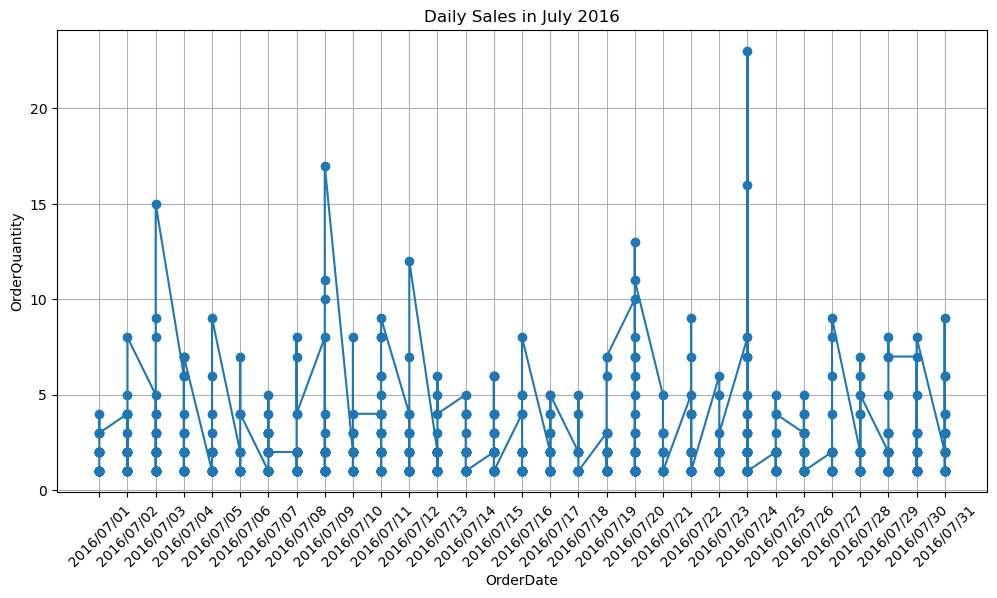

In [46]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales['OrderQuantity'], marker='o')
plt.title('Daily Sales in July 2016')
plt.xlabel('OrderDate')
plt.ylabel('OrderQuantity')
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Top regions by sales in July 2016

In [47]:
fact_table = pd.read_csv('C:/Users/Adekoyejo.dada/Desktop/3signet/AdventureWorks_Sales_2016.csv')
dimension_table =pd.read_csv('C:/Users/Adekoyejo.dada/Desktop/3signet/AdventureWorks_Territories.csv')

In [48]:
print(fact_table)
print(dimension_table)

        OrderDate   StockDate OrderNumber  ProductKey  CustomerKey  \
0      01/01/2016  10/17/2002     SO48797         385        14335   
1      01/01/2016   9/30/2002     SO48802         383        24923   
2      01/01/2016  11/29/2002     SO48801         326        15493   
3      01/01/2016  11/16/2002     SO48799         352        26708   
4      01/01/2016  12/16/2002     SO48798         369        23332   
...           ...         ...         ...         ...          ...   
23930  12/31/2016  12/11/2003     SO61111         591        17841   
23931  12/31/2016  10/15/2003     SO61147         464        12146   
23932  12/31/2016  11/04/2003     SO61147         528        12146   
23933  12/31/2016  11/09/2003     SO61147         215        12146   
23934  12/31/2016  11/16/2003     SO61147         537        12146   

       TerritoryKey  OrderLineItem  OrderQuantity  
0                 1              1              1  
1                 9              1              1  
2  

In [49]:
fact_table['OrderDate'] = pd.to_datetime(fact_table['OrderDate'])
fact_table['OrderDate'] = fact_table['OrderDate'].dt.strftime('%Y/%m/%d')

In [50]:
dimension_table.rename(columns={'SalesTerritoryKey' : 'TerritoryKey'}, inplace=True)


In [51]:
#Join the fact table and dimension table based on TerritoryKey

merged_data =pd.merge(fact_table, dimension_table, on='TerritoryKey', how = 'inner')

In [52]:
print (merged_data)

        OrderDate   StockDate OrderNumber  ProductKey  CustomerKey  \
0      2016/01/01  10/17/2002     SO48797         385        14335   
1      2016/01/01  11/29/2002     SO48801         326        15493   
2      2016/01/04   9/15/2002     SO48827         360        26729   
3      2016/01/07  11/18/2002     SO48843         324        15489   
4      2016/01/07  10/29/2002     SO48847         383        14336   
...           ...         ...         ...         ...          ...   
23930  2016/11/26   8/30/2003     SO58620         462        13291   
23931  2016/11/26  09/06/2003     SO58620         485        13291   
23932  2016/11/26   9/13/2003     SO58620         220        13291   
23933  2016/12/29  09/04/2003     SO60985         528        18315   
23934  2016/12/29  10/28/2003     SO60985         480        18315   

       TerritoryKey  OrderLineItem  OrderQuantity     Region        Country  \
0                 1              1              1  Northwest  United States   
1

In [53]:
region_sales = merged_data.groupby(['TerritoryKey', 'Region'])['OrderQuantity'].sum().reset_index()

print(region_sales)

   TerritoryKey          Region  OrderQuantity
0             1       Northwest           5390
1             2       Northeast             16
2             3         Central             16
3             4       Southwest           7287
4             5       Southeast             13
5             6          Canada           4811
6             7          France           3397
7             8         Germany           3338
8             9       Australia           7616
9            10  United Kingdom           4346


In [54]:
top_regions = region_sales.sort_values(by='OrderQuantity', ascending=False).head(9)

In [55]:
print(top_regions)

   TerritoryKey          Region  OrderQuantity
8             9       Australia           7616
3             4       Southwest           7287
0             1       Northwest           5390
5             6          Canada           4811
9            10  United Kingdom           4346
6             7          France           3397
7             8         Germany           3338
1             2       Northeast             16
2             3         Central             16


In [56]:
df= pd.DataFrame(top_regions)

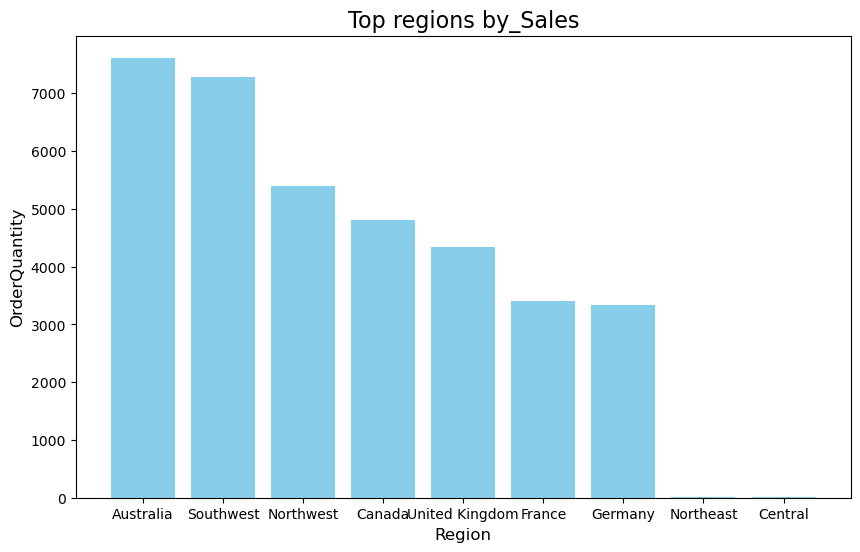

In [57]:
plt.figure(figsize=(10,6))
plt.bar(df['Region'], df['OrderQuantity'], color='skyblue')
plt.title('Top regions by_Sales', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('OrderQuantity', fontsize=12)
plt.show()

# ANALYSIS FOR SEPTEMBER 2017

In [58]:
df = pd.read_csv('C:/Users/Adekoyejo.dada/Desktop/3signet/AdventureWorks_Sales_2017.csv')

In [59]:
#Convert the date column to datetime format
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df['OrderDate'] = df['OrderDate'].dt.strftime('%Y/%m/%d')
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29481 entries, 0 to 29480
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   OrderDate      29481 non-null  object
 1   StockDate      29481 non-null  object
 2   OrderNumber    29481 non-null  object
 3   ProductKey     29481 non-null  int64 
 4   CustomerKey    29481 non-null  int64 
 5   TerritoryKey   29481 non-null  int64 
 6   OrderLineItem  29481 non-null  int64 
 7   OrderQuantity  29481 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 1.8+ MB
None
    OrderDate   StockDate OrderNumber  ProductKey  CustomerKey  TerritoryKey  \
0  2017/01/01  12/13/2003     SO61285         529        23791             1   
1  2017/01/01   9/24/2003     SO61285         214        23791             1   
2  2017/01/01  09/04/2003     SO61285         540        23791             1   
3  2017/01/01   9/28/2003     SO61301         529        16747             1   
4  2017

In [60]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

In [61]:
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29481 entries, 0 to 29480
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   OrderDate      29481 non-null  datetime64[ns]
 1   StockDate      29481 non-null  object        
 2   OrderNumber    29481 non-null  object        
 3   ProductKey     29481 non-null  int64         
 4   CustomerKey    29481 non-null  int64         
 5   TerritoryKey   29481 non-null  int64         
 6   OrderLineItem  29481 non-null  int64         
 7   OrderQuantity  29481 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 1.8+ MB
None


# TOP PERFORMING PRODUCTS IN SEPTEMBER 2017

In [62]:
fact_table = pd.read_csv('C:/Users/Adekoyejo.dada/Desktop/3signet/AdventureWorks_Sales_2017.csv')
dimension_table =pd.read_csv('C:/Users/Adekoyejo.dada/Desktop/3signet/AdventureWorks_Products.csv')

In [63]:
print(fact_table)
print(dimension_table)

        OrderDate   StockDate OrderNumber  ProductKey  CustomerKey  \
0      01/01/2017  12/13/2003     SO61285         529        23791   
1      01/01/2017   9/24/2003     SO61285         214        23791   
2      01/01/2017  09/04/2003     SO61285         540        23791   
3      01/01/2017   9/28/2003     SO61301         529        16747   
4      01/01/2017  10/21/2003     SO61301         377        16747   
...           ...         ...         ...         ...          ...   
29476   6/30/2017   3/22/2004     SO74143         477        28517   
29477   6/30/2017   3/15/2004     SO74143         479        28517   
29478   6/30/2017  04/08/2004     SO74143         606        28517   
29479   6/30/2017   5/15/2004     SO74124         480        21676   
29480   6/30/2017  05/04/2004     SO74124         538        21676   

       TerritoryKey  OrderLineItem  OrderQuantity  
0                 1              2              2  
1                 1              3              1  
2  

In [64]:
fact_table['OrderDate'] = pd.to_datetime(fact_table['OrderDate'])
fact_table['OrderDate'] = fact_table['OrderDate'].dt.strftime('%Y/%m/%d')

In [65]:
merged_data =pd.merge(fact_table, dimension_table, on='ProductKey', how = 'inner')

In [66]:
merged_product = merged_data.groupby(['OrderDate','ProductKey', 'ModelName', 'ProductName'])['OrderQuantity'].sum().reset_index()

print(merged_product)

        OrderDate  ProductKey                ModelName  \
0      2017/01/01         214                Sport-100   
1      2017/01/01         215                Sport-100   
2      2017/01/01         220                Sport-100   
3      2017/01/01         223              Cycling Cap   
4      2017/01/01         229  Long-Sleeve Logo Jersey   
...           ...         ...                      ...   
10001  2017/06/30         584                 Road-750   
10002  2017/06/30         585             Touring-3000   
10003  2017/06/30         604                 Road-750   
10004  2017/06/30         605                 Road-750   
10005  2017/06/30         606                 Road-750   

                      ProductName  OrderQuantity  
0           Sport-100 Helmet, Red              4  
1         Sport-100 Helmet, Black              3  
2          Sport-100 Helmet, Blue              5  
3                    AWC Logo Cap              9  
4      Long-Sleeve Logo Jersey, M              1

In [67]:
# Filter for September 2017
September_data = merged_product[(merged_product['OrderDate'] >= '2017/09/01') & (merged_product['OrderDate'] <= '2017/09/30')]

In [68]:
print (September_data)

Empty DataFrame
Columns: [OrderDate, ProductKey, ModelName, ProductName, OrderQuantity]
Index: []


The above output shows that the September 2017 data is non-existent, Hence..There is no need for further query.

# Analysis of Customer Demographics to understand customer behaviour

In [69]:
df = pd.read_csv('C:/Users/Adekoyejo.dada/Desktop/3signet/AdventureWorks_Customers.csv', encoding='ISO-8859-1')
dimension_table_1 = pd.read_csv('C:/Users/Adekoyejo.dada/Desktop/3signet/AdventureWorks_Sales_2015.csv')
dimension_table_2 = pd.read_csv('C:/Users/Adekoyejo.dada/Desktop/3signet/AdventureWorks_Sales_2016.csv')
dimension_table_3 = pd.read_csv('C:/Users/Adekoyejo.dada/Desktop/3signet/AdventureWorks_Sales_2017.csv')

In [70]:
dimension_table_1['OrderDate'] = pd.to_datetime(dimension_table_1['OrderDate'])
dimension_table_1['OrderDate'] = dimension_table_1['OrderDate'].dt.strftime('%Y/%m/%d')

In [71]:
dimension_table_2['OrderDate'] = pd.to_datetime(dimension_table_2['OrderDate'])
dimension_table_2['OrderDate'] = dimension_table_2['OrderDate'].dt.strftime('%Y/%m/%d')

In [72]:
dimension_table_3['OrderDate'] = pd.to_datetime(dimension_table_3['OrderDate'])
dimension_table_3['OrderDate'] = dimension_table_3['OrderDate'].dt.strftime('%Y/%m/%d')

In [73]:
# Vertically concatenate the DataFrames
merged_df = pd.concat([dimension_table_1, dimension_table_2, dimension_table_3], ignore_index=True)
print(merged_df)

        OrderDate   StockDate OrderNumber  ProductKey  CustomerKey  \
0      2015/01/01   9/21/2001     SO45080         332        14657   
1      2015/01/01  12/05/2001     SO45079         312        29255   
2      2015/01/01  10/29/2001     SO45082         350        11455   
3      2015/01/01  11/16/2001     SO45081         338        26782   
4      2015/01/02  12/15/2001     SO45083         312        14947   
...           ...         ...         ...         ...          ...   
56041  2017/06/30   3/22/2004     SO74143         477        28517   
56042  2017/06/30   3/15/2004     SO74143         479        28517   
56043  2017/06/30  04/08/2004     SO74143         606        28517   
56044  2017/06/30   5/15/2004     SO74124         480        21676   
56045  2017/06/30  05/04/2004     SO74124         538        21676   

       TerritoryKey  OrderLineItem  OrderQuantity  
0                 1              1              1  
1                 4              1              1  
2  

In [74]:
re_merged_data = pd.merge(df, merged_df, on='CustomerKey', how = 'left')

In [75]:
print (re_merged_data)

       CustomerKey Prefix FirstName LastName   BirthDate MaritalStatus Gender  \
0            11000    MR.       JON     YANG  08/04/1966             M      M   
1            11000    MR.       JON     YANG  08/04/1966             M      M   
2            11000    MR.       JON     YANG  08/04/1966             M      M   
3            11000    MR.       JON     YANG  08/04/1966             M      M   
4            11000    MR.       JON     YANG  08/04/1966             M      M   
...            ...    ...       ...      ...         ...           ...    ...   
56773        29480   MRS.      NINA     RAJI  1960-41-10             S      F   
56774        29480   MRS.      NINA     RAJI  1960-41-10             S      F   
56775        29481    MR.      IVAN     SURI  1960-41-05             S      M   
56776        29482    MR.   CLAYTON    ZHANG  1959-43-05             M      M   
56777        29483    MR.     JÉSUS  NAVARRO  1959-42-08             M      M   

                       Emai

# Demography - Gender

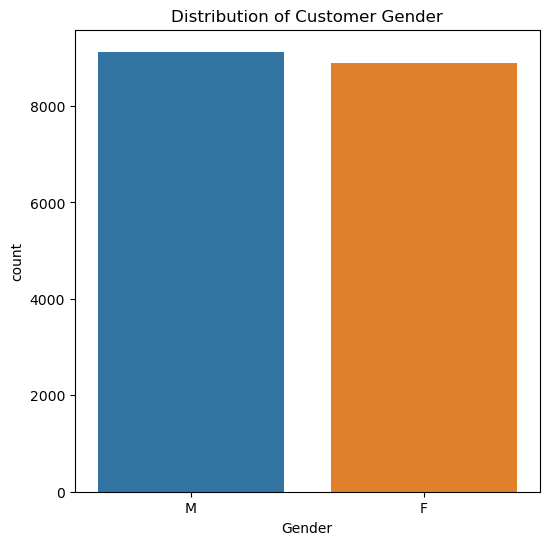

In [76]:
# Plot distribution of customer gender
plt.figure(figsize=(6, 6))
sns.countplot(x='Gender', data=df)
plt.title('Distribution of Customer Gender')
plt.show()

# Demography - Income

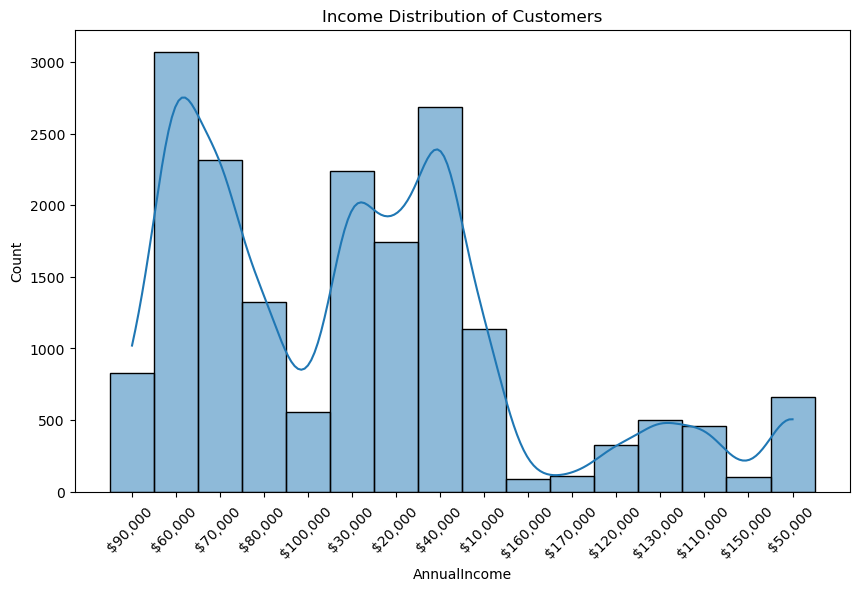

In [77]:
# Visualize customer income distribution (if available)
plt.figure(figsize=(10, 6))
sns.histplot(df['AnnualIncome'], bins=50, kde=True)
plt.xticks(rotation=45)
plt.title('Income Distribution of Customers')
plt.show()

# 